<h1>IS 362 - NYC Motor Vehicle Accidents</h1>
<h3>Final Project - Fall 2020 - Joshua Rifkin</h3>

In [1]:
import pandas as pd
import seaborn as sns

file = "C:/Users/joshz/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv"

In [2]:
data = pd.read_csv(file)
data

C:\Users\joshz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,12/07/2020,19:27,BRONX,10475,40.871470,-73.830570,"(40.87147, -73.83057)",ALCOTT PLACE,ASCH LOOP,NaN,...,NaN,NaN,NaN,NaN,4374449,Sedan,NaN,NaN,NaN,NaN
1,12/07/2020,6:00,QUEENS,11372,40.755264,-73.888170,"(40.755264, -73.88817)",NORTHERN BOULEVARD,79 STREET,NaN,...,NaN,NaN,NaN,NaN,4374434,Taxi,NaN,NaN,NaN,NaN
2,12/06/2020,14:25,NaN,NaN,NaN,NaN,NaN,VERRAZANO BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4374156,Sedan,Sedan,NaN,NaN,NaN
3,12/06/2020,16:40,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4373833,Sedan,Sedan,NaN,NaN,NaN
4,12/06/2020,1:30,NaN,NaN,NaN,NaN,NaN,BELT PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4373348,Sedan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738132,07/06/2012,23:50,MANHATTAN,10039,40.825981,-73.935904,"(40.8259814, -73.935904)",7 AVENUE,WEST 152 STREET,NaN,...,Unspecified,NaN,NaN,NaN,66355,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1738133,07/04/2012,2:05,NaN,NaN,40.806346,-73.933172,"(40.8063462, -73.9331715)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2864069,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1738134,07/11/2012,20:30,NaN,NaN,NaN,NaN,NaN,KINGS HIGHWAY,CLARENDON ROAD,NaN,...,Unspecified,NaN,NaN,NaN,135140,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1738135,07/07/2012,13:35,BROOKLYN,11219,40.628846,-73.998544,"(40.6288462, -73.9985445)",60 STREET,13 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,129956,BUS,PASSENGER VEHICLE,NaN,NaN,NaN


I start by converting the CRASH DATA column into a datetime object type so that I can split it into three new columns - day, month, and year. This way, I can chart during which months most accidents occur.

In [3]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

data["day"] = data['CRASH DATE'].map(lambda x: x.day)
data["month"] = data['CRASH DATE'].map(lambda x: x.month)
data["year"] = data['CRASH DATE'].map(lambda x: x.year)

Next we will create a column of the days of the week based on the datetime objects we created before.

In [4]:
data['day_of_week'] = data['CRASH DATE'].dt.day_name()

With most of our data organized we can start plotting the data to see trends.

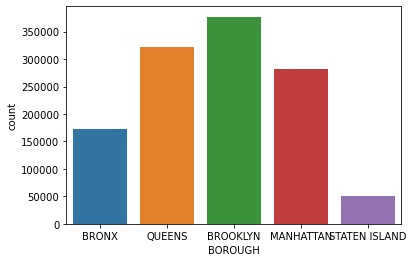

In [5]:
sns.countplot(x='BOROUGH', data=data)

We can see from the chart above that the majority of accidents take place in Brooklyn.

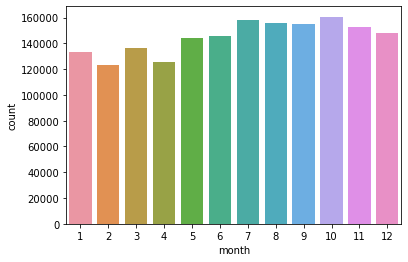

In [6]:
sns.countplot(x='month', data=data)

It is interesting to see that most accidents occur during the late summer through fall months. July through October. This is not what I necessarily would have thought. I would have thought that most accidents would occur during the winter, when driving conditions are worse, or perhaps even in the spring when there tends to be more rain.

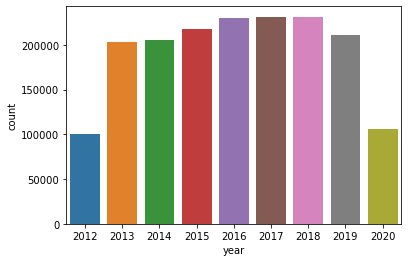

In [7]:
sns.countplot(x='year', data=data)

As you can see in the chart above. There is a fairly even distribution of accidents per year, thought the number does seem to have been slowly growing with the exception of 2019 when the total number of accidents dropped. The reason that 2012 and 2020 have such low accident counts may be due to incomplete data. The database used was started in 2014 and may not have complete data for 2012. Regarding 2020, we are not quite finished with the year yet and the data is still coming in. That being said, due to the COVID-19 Pandemic this year, the number may still be lower since significantly fewer people were leaving their houses for a large portion of the year.

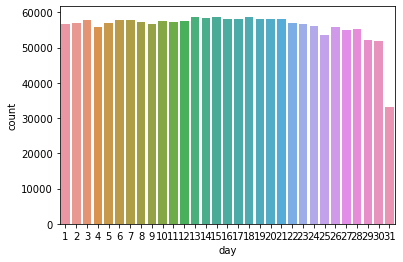

In [8]:
sns.countplot(x='day', data=data)

In the chart above, you can see that the distribution of accidents does not seem to trend toward one particular end of the month. This implies that people do not tend to drive in a riskier manner at any particular time of the month.

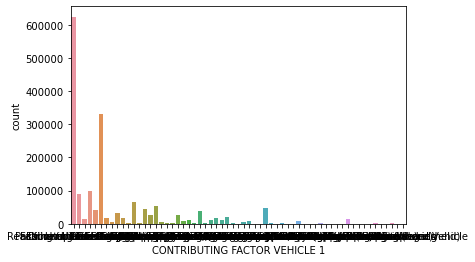

In [9]:
sns.countplot(x='CONTRIBUTING FACTOR VEHICLE 1', data=data)

In [10]:
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                       624412
Driver Inattention/Distraction    332525
Failure to Yield Right-of-Way     100010
Following Too Closely              89217
Backing Unsafely                   66278
                                   ...  
Shoulders Defective/Improper          77
Windshield Inadequate                 70
Texting                               37
Listening/Using Headphones            18
1                                     10
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 61, dtype: int64

As can be seen from the chart and list above, most accidents with a specified reason occur because of inattentive drivers. Surprisingly, texting alone is one of the least common causes of accidents.

In [11]:
topfactors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
topfactors = topfactors.nlargest(10)
topfactors

Unspecified                       624412
Driver Inattention/Distraction    332525
Failure to Yield Right-of-Way     100010
Following Too Closely              89217
Backing Unsafely                   66278
Other Vehicular                    54959
Fatigued/Drowsy                    47005
Turning Improperly                 43601
Passing or Lane Usage Improper     42897
Passing Too Closely                39322
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

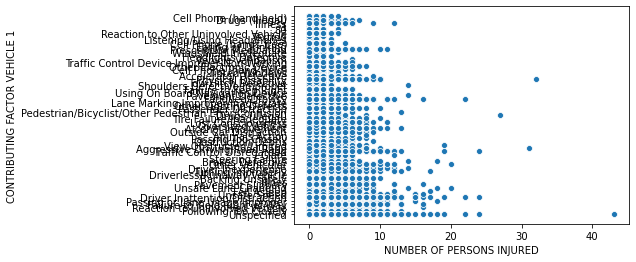

In [21]:
sns.scatterplot(y='CONTRIBUTING FACTOR VEHICLE 1', x='NUMBER OF PERSONS INJURED', data=data)

<h3>Conclusion</h3>
As can be seen in the graphs above, driving can lead to accidents whenever or wherever you are. There does not seem to be any correlation between time and location with regard to whether an accident will occur. Sure, accidents are more common in Brooklyn and Manhattan than they are in Staten Island, but you must also consider that there are far fewer cars on the road in Staten Island than there are in Brooklyn.
However, there is a strong correlation between inattentive driving or inconsiderate driving and accident occurrence. We must remember to always be careful, attentive, and considerate drivers, regardless of when or where we are driving.